This notebook analyzes the medal distribution from the 2008 Olympics using the principles of tidy data  We'll explore which sports had the most medals awarded and examine the distribution of gold, silver, and bronze medals across the games.

Below, we load the data set and the necessary python tools. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file = "C:/Users/James Thompson/OneDrive/Documents/GitHub/THOMPSON-Data-Science-Portfolio/TinyDataProject/olympics_08_medalists.csv"
df = pd.read_csv(file)


In this section, we apply Wickham's tidy data principles to transform our messy dataset:

To convert from wide to long format: Using pandas' melt() function, I reshaped the data so each row represents a single observation
To ensure each variable has its own column, I split the combined sport_gender column into separate gender and sport columns using str.split()
To clean the variables I uses str.replace() to remove unwanted characters from the sport names
To handle missing values I changed rows where no medal was awarded using dropna()
To structure the table I reordered columns to create a logical flow of data

By applying these tidying techniques, we create a dataset that is much easier to analyze and visualize.

In [13]:
# Melt the dataset to long format
df_melted = df.melt(id_vars=["medalist_name"], var_name="sport_gender", value_name="medal")

# Drop rows where the medal column is NaN (i.e., no medal awarded)
df_melted = df_melted.dropna(subset=["medal"])

# Split the 'sport_gender' column into 'gender' and 'sport'
df_melted[["gender", "sport"]] = df_melted["sport_gender"].str.split("_", n=1, expand=True)

# Clean column names by replacing unwanted characters
df_melted["sport"] = df_melted["sport"].str.replace(r'\W+', ' ', regex=True).str.strip()

# Reorder columns
df_tidy = df_melted[["gender", "sport", "medal"]]

# Set the style for the plots
sns.set(style="whitegrid")

The first visualization shows the total medal count across different sports in the 2008 Olympics. With our tidy dataset, creating this visualization becomes straightforward - demonstrating what Wickham means when he says tidy datasets are "easy to manipulate, model and visualise." Wickham highlights that these because our data is within disntict variables and easily organized, it creates compelling graphs. 

C:\Users\James Thompson\AppData\Local\Temp\ipykernel_33132\2411283962.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tidy, y="sport", order=df_tidy["sport"].value_counts().index, palette="pastel")


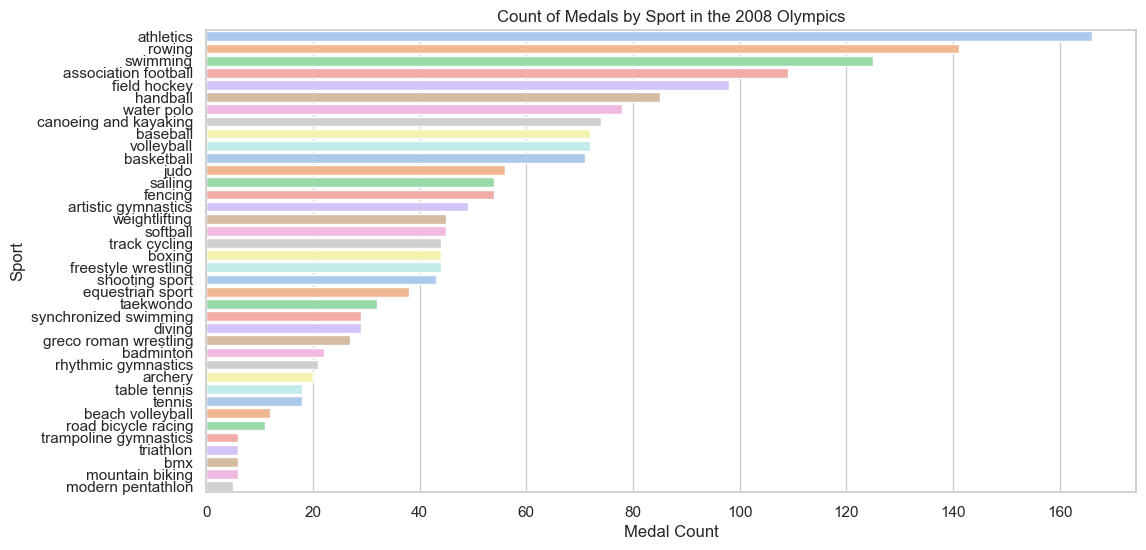

In [14]:
# Plot 1: Count of Medals by Sport
plt.figure(figsize=(12, 6))
sns.countplot(data=df_tidy, y="sport", order=df_tidy["sport"].value_counts().index, palette="pastel")
plt.title("Count of Medals by Sport in the 2008 Olympics")
plt.xlabel("Medal Count")
plt.ylabel("Sport")
plt.show()

In [16]:
# Count medals by type
df_medal_counts = df_tidy["medal"].value_counts().reset_index()
df_medal_counts.columns = ["medal", "count"]


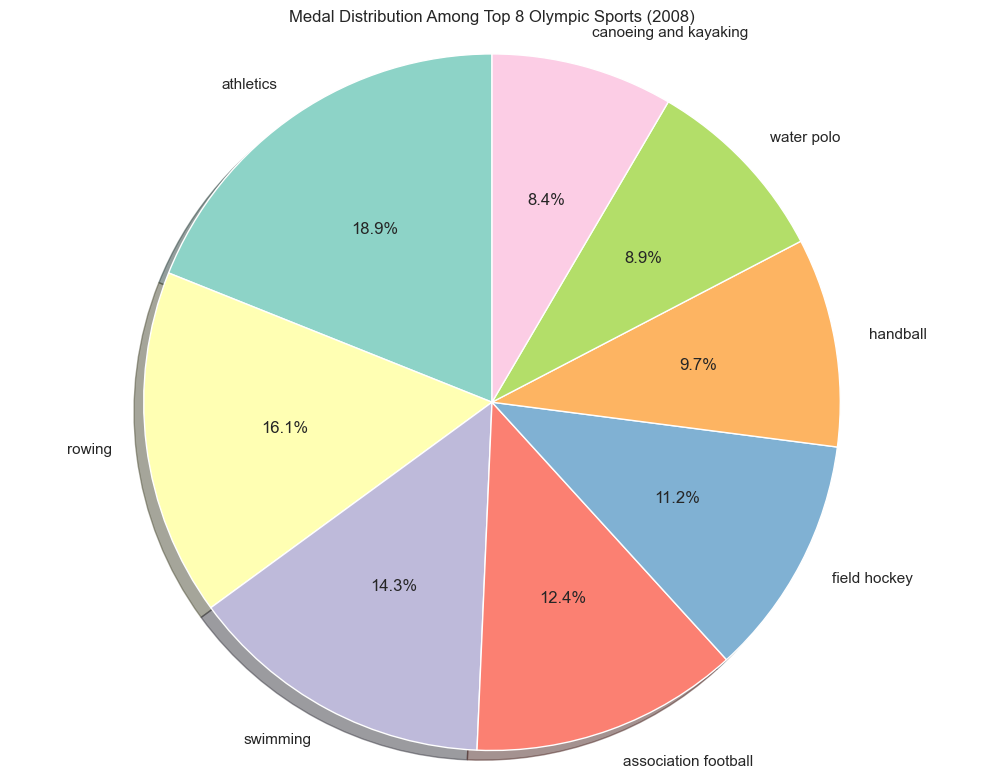

The top 8 sports account for 46.7% of all medals awarded


In [20]:
# Create a more interesting pie chart - Medal distribution by top sports
top_sports = df_tidy["sport"].value_counts().head(8).index  # Get top 8 sports
top_sports_data = df_tidy[df_tidy["sport"].isin(top_sports)]

# Group by sport and count medals
sport_counts = top_sports_data["sport"].value_counts()

# Create an improved pie chart
plt.figure(figsize=(10, 8))
plt.pie(sport_counts, labels=sport_counts.index, autopct="%1.1f%%", 
        startangle=90, shadow=True, 
        colors=sns.color_palette("Set3", len(sport_counts)))
plt.title("Medal Distribution Among Top 8 Olympic Sports (2008)")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.tight_layout()
plt.show()

# Add a text explanation
print(f"The top 8 sports account for {sport_counts.sum() / len(df_tidy) * 100:.1f}% of all medals awarded")

The second visualization shows the distribution of medals among the top Olympic sports. Rather than just showing the standard distribution of gold/silver/bronze (which is predictably equal by Olympic design), this pie chart reveals which sports contributed most significantly to the overall medal count.
This visualization would be nearly impossible to create efficiently from the original untidy dataset. However, with our tidy data structure, we can easily identify the top sports by medal count and create a meaningful visualization with minimal code. This again demonstrates Wickham's point about the analytical advantages of properly structured data.

Using our tidy dataset, we can easily create powerful aggregations using pivot tables. This demonstrates another advantage of tidy data - it enables consistent tools and techniques for analysis, as Wickham notes in his paper.
Our pivot table aggregates medal counts by sport, gender, and medal type, providing a comprehensive view of the medal distribution that would be difficult to achieve with the original messy dataset.

In [19]:
# Create a better pivot table with aggregation
# Count medals by sport and gender
medals_by_sport_gender = df_tidy.groupby(['sport', 'gender', 'medal']).size().reset_index(name='count')

# Create a pivot table
medal_pivot = medals_by_sport_gender.pivot_table(
    index='sport',
    columns=['gender', 'medal'],
    values='count',
    fill_value=0
)

# Display the pivot table
print("Pivot Table of Medals by Sport, Gender, and Medal Type:")
display(medal_pivot)

# Alternative: Create a simpler aggregation to ensure you meet the requirement
print("\nSimple Medal Count Aggregation by Sport:")
sport_medal_counts = df_tidy.groupby('sport')['medal'].count().sort_values(ascending=False)
display(sport_medal_counts)

Pivot Table of Medals by Sport, Gender, and Medal Type:


gender                female                male             
medal                 bronze  gold silver bronze  gold silver
sport                                                        
archery                  4.0   2.0    3.0    4.0   3.0    4.0
artistic gymnastics      7.0   7.0    6.0   12.0   7.0   10.0
association football    18.0  18.0   18.0   18.0  19.0   18.0
athletics               26.0  27.0   28.0   29.0  25.0   31.0
badminton                3.0   3.0    4.0    4.0   4.0    4.0
baseball                 0.0   0.0    0.0   24.0  24.0   24.0
basketball              12.0  12.0   12.0   12.0  11.0   12.0
beach volleyball         2.0   2.0    2.0    2.0   2.0    2.0
bmx                      1.0   1.0    1.0    1.0   1.0    1.0
boxing                   0.0   0.0    0.0   22.0  11.0   11.0
canoeing and kayaking    8.0   7.0    6.0   19.0  17.0   17.0
diving                   6.0   2.0    5.0    5.0   5.0    6.0
equestrian sport         9.0   4.0    7.0    5.0   7.0    6.0
fencing                  5.0  11.0   10.0   10.0   7.0   11.0
field hockey            16.0  16.0   16.0   17.0  17.0   16.0
freestyle wrestling      8.0   4.0    4.0   14.0   7.0    7.0
greco roman wrestling    0.0   0.0    0.0   13.0   7.0    7.0
handball                14.0  14.0   14.0   14.0  15.0   14.0
judo                    14.0   7.0    7.0   14.0   7.0    7.0
modern pentathlon        0.0   1.0    1.0    1.0   1.0    1.0
mountain biking          1.0   1.0    1.0    1.0   1.0    1.0
rhythmic gymnastics      7.0   7.0    7.0    0.0   0.0    0.0
road bicycle racing      2.0   2.0    2.0    2.0   1.0    2.0
rowing                  18.0  20.0   20.0   27.0  28.0   28.0
sailing                  7.0   7.0    7.0   11.0  11.0   11.0
shooting sport           6.0   6.0    5.0    9.0   8.0    9.0
softball                15.0  15.0   15.0    0.0   0.0    0.0
swimming                22.0  21.0   20.0   21.0  18.0   23.0
synchronized swimming   11.0   9.0    9.0    0.0   0.0    0.0
table tennis             4.0   1.0    4.0    4.0   1.0    4.0
taekwondo                8.0   4.0    4.0    8.0   4.0    4.0
tennis                   3.0   3.0    3.0    3.0   3.0    3.0
track cycling            3.0   3.0    3.0   13.0   8.0   14.0
trampoline gymnastics    1.0   1.0    1.0    1.0   1.0    1.0
triathlon                1.0   1.0    1.0    1.0   1.0    1.0
volleyball              12.0  12.0   12.0   12.0  12.0   12.0
water polo              13.0  13.0   13.0   13.0  13.0   13.0
weightlifting            7.0   7.0    7.0    8.0   8.0    8.0


Simple Medal Count Aggregation by Sport:


sport
athletics                166
rowing                   141
swimming                 125
association football     109
field hockey              98
handball                  85
water polo                78
canoeing and kayaking     74
baseball                  72
volleyball                72
basketball                71
judo                      56
sailing                   54
fencing                   54
artistic gymnastics       49
softball                  45
weightlifting             45
freestyle wrestling       44
track cycling             44
boxing                    44
shooting sport            43
equestrian sport          38
taekwondo                 32
synchronized swimming     29
diving                    29
greco roman wrestling     27
badminton                 22
rhythmic gymnastics       21
archery                   20
table tennis              18
tennis                    18
beach volleyball          12
road bicycle racing       11
mountain biking            6
trampoli